## Importing Required Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import descartes
import matplotlib.pyplot as plt
import dataframe_image as dfi
import folium
from IPython.display import Image
from PIL import Image

## Work directory

In [2]:
work_dir = "../Data/"

## Reading file

In [3]:
df = gpd.read_file(work_dir + "india_ds.shp")

## Checking top 5 values

In [4]:
df.head()

,DST_ID,DISTRICT,STATE,geometry
0,1,Gilgit,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,3,Ladakh,JAMMU AND KASHMIR,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,5,Kupwara,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."


## Creating 'Population' column with random integer values

In [5]:
df['POPULATION'] = np.random.randint(100000, high=None, size=len(df))

In [6]:
df['EDUCATION%'] = np.random.randint(100, high=None, size=len(df))

## Exporting the GeoDataFrame to a shapefile

In [7]:
df.to_file(work_dir + "updated_input_file.shp", driver='ESRI Shapefile')

In [8]:
updated_geo_df = gpd.read_file(work_dir + "updated_input_file.shp")

In [9]:
updated_geo_df.head(2)

,DST_ID,DISTRICT,STATE,POPULATION,EDUCATION%,geometry
0,1,Gilgit,JAMMU AND KASHMIR,43004,1,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,26649,92,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."


In [10]:
updated_geo_df.columns

Index(['DST_ID', 'DISTRICT', 'STATE', 'POPULATION', 'EDUCATION%', 'geometry'], dtype='object')

## Arranging the dataset in descending order of 'EDUCATION %' column

In [11]:
sorted_df = df.sort_values('EDUCATION%', ascending=False)

## Plotting Graph on basis of 'EDUCATION %' column

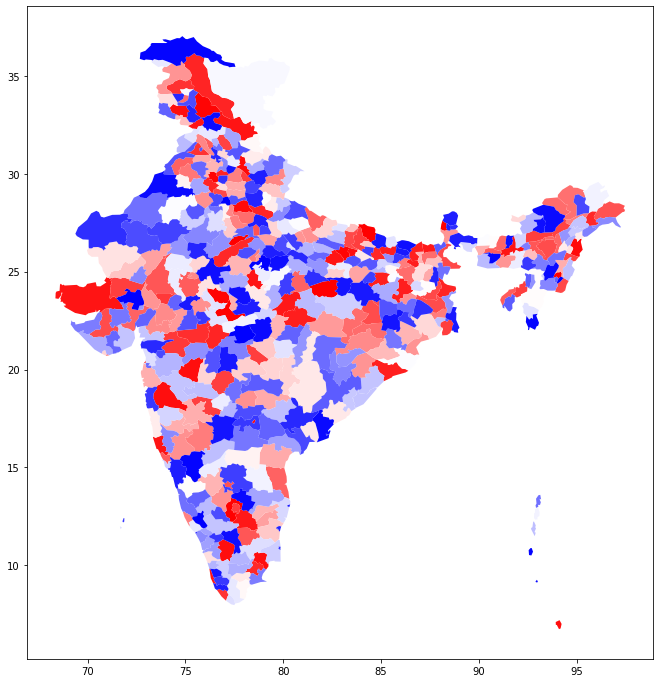

In [12]:
sorted_df.plot(column = 'EDUCATION%',cmap = "bwr",figsize = (12,12))

## Converting and Exporting Shapefile as JPEG file 

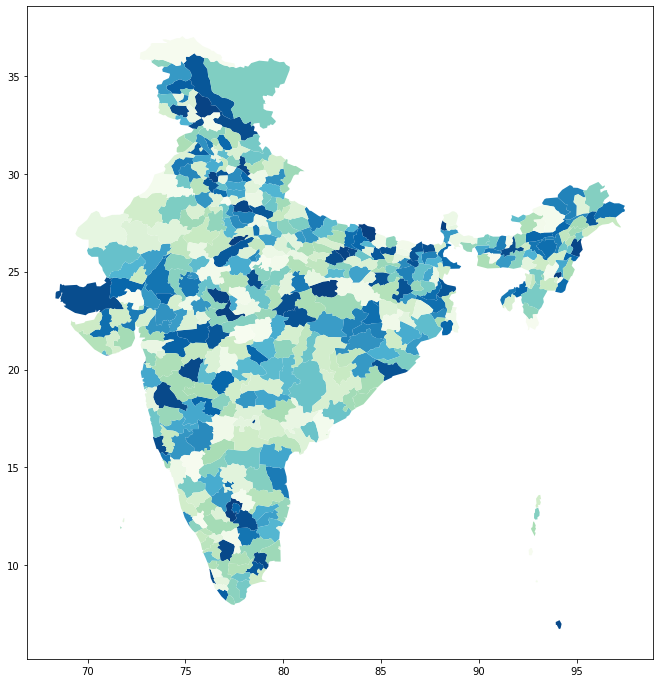

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
sorted_df.plot(ax=ax,column = 'EDUCATION%',cmap = "GnBu",figsize = (12,12))

## Setting the title of the plot

In [14]:
ax.set_title('My Geopandas Dataframe')

Text(0.5, 1.0, 'My Geopandas Dataframe')

## Setting the x-axis and y-axis limits

In [15]:
ax.set_xlim(sorted_df.total_bounds[0], sorted_df.total_bounds[2])
ax.set_ylim(sorted_df.total_bounds[1], sorted_df.total_bounds[3])

(6.733651, 37.03473)

## Saving file in JPEG

In [16]:
fig.savefig('..\Output\image_file.jpeg', dpi=300, bbox_inches='tight')
#Image.open('..\Output\image_file.jpeg').convert('RGB').save('..\Output\image_file.jpeg')

## Opening the JPEG file

In [17]:
image = Image.open('../Output/image_file.jpeg')

# Display the image in Jupyter Notebook
image.show()

##  Exporting Shapefile as geoJSON file 

In [18]:
df.to_file('../Data/my_geojson_file.geojson', driver='GeoJSON')

## Reading same geoJSON file to check whether it's succesfully exported as geoJSON or not

In [19]:
geo_df = gpd.read_file('../Data/my_geojson_file.geojson')

In [20]:
geo_df.head()

,DST_ID,DISTRICT,STATE,POPULATION,EDUCATION%,geometry
0,1,Gilgit,JAMMU AND KASHMIR,43004,1,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,26649,92,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,3,Ladakh,JAMMU AND KASHMIR,50114,48,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,53004,45,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,5,Kupwara,JAMMU AND KASHMIR,35111,70,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."
